In [1]:
### SPUSTIT TOHLE NA PC PŘED PRACÍ !!

import os
import sys

# Set the working directory to the project directory
device = input("Zadej prosím, na jakém zařízení děláš (mac/doma/prace): ")
if device == "doma":
    project_dir = r"C:/Users/danie/Desktop/mrtva_doba_VU"
    os.chdir(project_dir)
elif device == "mac":
    project_dir = r"/Users/danielptacek/Desktop/mrtva_doba_VU"
    os.chdir(project_dir)
else:
    project_dir = r"U:/Dokumenty/mrtva_doba_VU"
    os.chdir(project_dir)


# Verify the change
print("Current working directory:", os.getcwd()) 

# Ensure the project directory is in sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

import pydicom # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
from glob import glob
from codes.custom_library import Graf_1_2

aktivity = {
    "20240708" : 700.589,
    "20240709" : 640.979,
    "20240710" : 586.294,
    "20240711" : 537.692,
    "20240712" : 495.958,
    "20240714" : 404.370,
    "20240715" : 379.365,
    "20240717" : 324.319,
    "20240719" : 266.596,
    "20240721" : 226.576,
    "20240723" : 190.942,
    "20240725" : 158.536,
    "20240726" : 152.496,
    "20240729" : 115.038,
    "20240731" : 93.633,
    "20240805" : 62.613,
    "20240808" : 49.233,
    "20240812" : 34.167,
    "20240815" : 26.602,
    "20240819" : 18.401
}

Current working directory: /Users/danielptacek/Desktop/mrtva_doba_VU


[np.float64(8.610315000089054), np.float64(8.392780396701031), np.float64(8.804130307555537), np.float64(8.51944386234267), np.float64(8.621884465297367)]


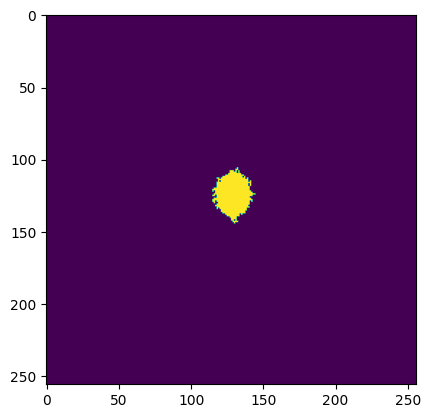

In [56]:
#### planarni kalibrace Discovery


from dicom_file_separator import separate_dicom_file
import matplotlib.pyplot as plt
from tew_correction import tew_correction
from codes.custom_library import region_growing
import numpy as np
from glob import glob

kalibrace_folder = "KALIBRACE_20240815/Kalibrace_plan_20240815_Discovery"
kalibrace_mds = sorted(glob(os.path.join(kalibrace_folder, 'Kalibrace*')))

prah = 0.1

hlava_1_kal_faktory = []
hlava_1_tew_kal_faktory = []
hlava_2_kal_faktory = []
hlava_2_tew_kal_faktory = []


for md in kalibrace_mds:
    image = separate_dicom_file(md)

    acq_time = image["Acq_time"]
    acq_date = image["Acq_date"]

    hlava_1 = image["Head1_EM"]
    hlava_1_tew = tew_correction(image["Head1_EM"], image["Head1_SC1"], image["Head1_SC2"])
    hlava_2 = image["Head2_EM"]
    hlava_2_tew = tew_correction(image["Head2_EM"], image["Head2_SC1"], image["Head2_SC2"])

    maska_1 = region_growing(hlava_1, prah*np.max(hlava_1))
    maska_1_tew = region_growing(hlava_1_tew, prah*np.max(hlava_1_tew))
    maska_2 = region_growing(hlava_2, prah*np.max(hlava_2))
    maska_2_tew = region_growing(hlava_2_tew, prah*np.max(hlava_2_tew))

    kal_faktor_1 = (np.sum(hlava_1*maska_1) / acq_time) / aktivity[acq_date]
    kal_faktor_1_tew = (np.sum(hlava_1_tew*maska_1_tew) / acq_time) / aktivity[acq_date]
    kal_faktor_2 = (np.sum(hlava_2*maska_2) / acq_time) / aktivity[acq_date]
    kal_faktor_2_tew = (np.sum(hlava_2_tew*maska_2_tew) / acq_time) / aktivity[acq_date]

    hlava_1_kal_faktory.append(kal_faktor_1)
    hlava_1_tew_kal_faktory.append(kal_faktor_1_tew)
    hlava_2_kal_faktory.append(kal_faktor_2)
    hlava_2_tew_kal_faktory.append(kal_faktor_2_tew)

print(hlava_2_kal_faktory)








